In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("Dataset/train.csv")

In [3]:
columns_to_drop = ["PassengerId", "Name", "Ticket", "Cabin", "Embarked"]

data_clean = data.drop(columns_to_drop, axis=1)

In [4]:
le = LabelEncoder()

data_clean["Sex"] = le.fit_transform(data_clean["Sex"])
data_clean = data_clean.fillna(data_clean["Age"].mean())

display(data_clean.head(n=10))

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
5,0,3,1,29.699118,0,0,8.4583
6,0,1,1,54.000000,0,0,51.8625
7,0,3,1,2.000000,3,1,21.0750
8,1,3,0,27.000000,0,2,11.1333
9,1,2,0,14.000000,1,0,30.0708


In [5]:
input_cols = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
output_cols = ["Survived"]

In [6]:
split = int(0.7 * data_clean.shape[0])
train_data = data_clean[:split]
test_data = data_clean[split:]
test_data = test_data.reset_index(drop=True)

In [7]:
X_train = train_data[input_cols]
Y_train = np.array(train_data[output_cols]).reshape((-1,))
X_test = test_data[input_cols]
Y_test = np.array(test_data[output_cols]).reshape((-1,))

In [8]:
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=5)

In [9]:
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
print("Training Accuracy : ", rf.score(X_train, Y_train))
print("Testing Accuracy : ", rf.score(X_test, Y_test))

Training Accuracy :  0.8587479935794543
Testing Accuracy :  0.832089552238806


In [11]:
acc = cross_val_score(RandomForestClassifier(n_estimators=10, max_depth=5, criterion='entropy'), X_train, Y_train, cv=5).mean()
print("Cross Validation Accuracy : ", acc)

Cross Validation Accuracy :  0.8057419354838709


In [12]:
acc_list = []
for i in range(1, 50):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i, max_depth=5), X_train, Y_train, cv=5).mean()
    acc_list.append(acc)

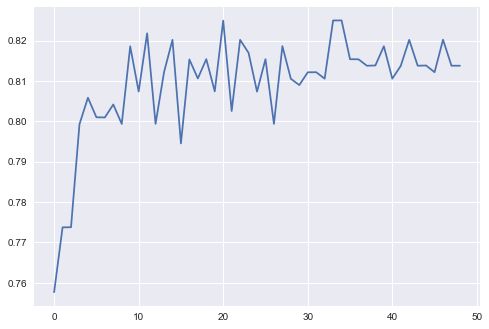

In [13]:
plt.style.use("seaborn")
plt.plot(acc_list)
plt.show()

In [14]:
print(np.argmax(acc_list))

34


In [15]:
rf = RandomForestClassifier(n_estimators=35, max_depth=5, criterion='entropy')
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=35,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
print("Training Accuracy : ", rf.score(X_train, Y_train))
print("Testing Accuracy : ", rf.score(X_test, Y_test))

Training Accuracy :  0.8539325842696629
Testing Accuracy :  0.835820895522388
